## Notebook specifically for creating a $\Delta m$ vs. $\lambda$ plot to see the affect starspots of various size and temperature will have on various bandpass magnitudes we are interested in.

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import HELP
get_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData
PleiadesDeltaV_VK = HELP.PleiadesDeltaV_VK
CMDData = HELP.CMDData
DeltaVfunc = HELP.DeltaVfunc

import getMag
getMag = getMag.getMag

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

In [34]:
PhTemp = '5800'
SpTempRange = [1,0.8,0.5]
FillFactorRange = [1,0.75,0.5]
#initialize arrays of filter names
bands = np.array(['U','B','V','R','J','H','Ks'])

syn_phot_combined = []
for i in range(len(SpTempRange)):
    SpTemp = str(round(SpTempRange[i]*5800/100)*100)
    FillFactor = FillFactorRange[i]
    wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhTemp,SpTemp,FillFactor) #Creates spectrum for desired temps and fill-factor
    Flux = Dotter_rad( PhTemp, flux_Phoenix )

    #fill up a 3D array 'syn_phot' with: filter name, center point, magnitude
    syn_phot = []
    for i in range(len(bands)):
        x = getMag_hires(bands[i],wavelength,Flux,'microns') #x returns three values; band, center, mag
        syn_phot.append(x)
    Filters, Centers, Magnitudes = MagConvert(syn_phot)
    syn_phot_combined.append(syn_phot)
for i in range(len(syn_phot_combined)):
    print(syn_phot_combined[i])
    print()



[('U', 0.365, 5.7389142389326775), ('B', 0.445, 5.6829617273790056), ('V', 0.551, 4.9918828351727047), ('R', 0.658, 4.6646198217101), ('J', 1.235, 3.8701433579144764), ('H', 1.662, 3.5091529698031487), ('Ks', 2.159, 3.4575141423412465)]

[('U', 0.365, 6.9789917589892738), ('B', 0.445, 6.6970036134937665), ('V', 0.551, 5.8468458996326476), ('R', 0.658, 5.3914583702469585), ('J', 1.235, 4.3022374291207885), ('H', 1.662, 3.7600000381502152), ('Ks', 2.159, 3.6747360148433881)]

[('U', 0.365, 6.4905821540782735), ('B', 0.445, 6.433415533639594), ('V', 0.551, 5.7403284915674977), ('R', 0.658, 5.4065409943889806), ('J', 1.235, 4.481385180934879), ('H', 1.662, 4.0802423859722792), ('Ks', 2.159, 3.987497198388088)]



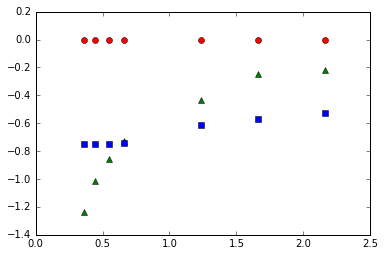

In [35]:
PointType = ['ro','g^','bs']
UnSpotMag = [i[2] for i in syn_phot_combined[0]] #Magnitudes of the unspotted star
idx=0
for i in range(len(syn_phot_combined)):
    Centers = [i[1] for i in syn_phot_combined[idx]]
    Magnitudes = [i[2] for i in syn_phot_combined[idx]]
    DeltaMag = []
    for i in range(len(UnSpotMag)):
        x = [UnSpotMag[i] - Magnitudes[i]]
        DeltaMag.append(x)
    plt.plot(Centers,DeltaMag,PointType[idx])
    idx=idx+1


plt.savefig('FirstRunDeltaMvLambda.jpg')